# <center>**PROJETO MINERAÇÃO DE DADOS**</center>
## <center>**Erick Spinelli Pimentel**</center>


#**Importando Bibliotecas**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#**O Dataset**

##**Informações:**

*   **datetime:** data por hora + timestamp
*   **season:**
<br>1 = primavera
<br>2 = verão
<br>3 = outono
<br>4 = inverno
*   **holiday:** se o dia é considerado feriado
*   **workingday:** se o dia não é fim de semana nem feriado
*   **wheater:**
<br>1 = céu limpo, poucas nuvens ou parcialmente nublado
<br>2 = Névoa + Nublado, Névoa + Nuvens quebradas, Névoa + Algumas nuvens, Névoa
<br>3 = neve fraca, chuva fraca + trovoada + nuvens dispersas, chuva fraca + nuvens dispersas
<br>4 = Chuva forte + Paletes de gelo + Trovoada + Névoa, Neve + Nevoeiro
*   **temp:** temperatura em Celsius
*   **atemp:** sensação térmica em Celsius
*   **humidity:** umidade relativa do ar
*   **windspeed:** velocidade do vento
*   **casual:** número de aluguéis de usuários não registrados no sistema
*   **registered:** - número de aluguéis de usuários registrados no sistema
*   **cnt:** número total de locações (nossa previsão)

Leitura dos dados

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/PERIODOS IFPB/7 - SETIMO PERIODO/MINERAÇÃO DE DADOS/day.csv')

Visualizando os dados

In [ ]:
dados.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,344.167,363.625,805.833,160.446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,363.478,353.739,696.087,248.539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,196.364,189.405,437.273,248.309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,212.122,590.435,160.296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,226.957,22.927,436.957,1.869,82,1518,1600


Verificando o tamanho do dataset

In [ ]:
dados.shape

(731, 16)

#Organização e Limpeza do Dataset

Setando "instant" como index

In [ ]:
dados = dados.set_index('instant')

Removendo as colunas "casual" e "registered", pois o objetivo é prever "cnt"

In [ ]:
dados.drop(['casual', 'registered'], axis=1, inplace=True)
dados.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,344.167,363.625,805.833,160.446,985
2,2011-01-02,1,0,1,0,0,0,2,363.478,353.739,696.087,248.539,801
3,2011-01-03,1,0,1,0,1,1,1,196.364,189.405,437.273,248.309,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200,212.122,590.435,160.296,1562
5,2011-01-05,1,0,1,0,3,1,1,226.957,22.927,436.957,1.869,1600


#Análises Preliminares

Estatísticas descritivas

In [ ]:
dados.describe().round(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,2.50,0.5,6.52,0.03,3.0,0.68,1.40,382.18,443.88,462.94,228.42,4504.35
std,1.11,0.5,3.45,0.17,2.0,0.47,0.54,265.08,198.79,287.91,186.85,1937.21
min,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.15,2.04,0.00,1.11,22.00
25%,2.00,0.0,4.00,0.00,1.0,0.00,1.00,181.53,307.45,77.75,136.51,3152.00
50%,3.00,1.0,7.00,0.00,3.0,1.00,1.00,385.83,463.38,542.92,187.81,4548.00
75%,3.00,1.0,10.00,0.00,5.0,1.00,2.00,621.67,603.55,687.29,251.83,5956.00
max,4.00,1.0,12.00,1.00,6.0,1.00,3.00,973.91,988.39,970.42,995.12,8714.00


**Matriz de correlação:**
<br>O coeficiente de correlação é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.

In [ ]:
dados.corr().round(4)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.0000,-0.0018,0.8314,-0.0105,-0.0031,0.0125,0.0192,0.1722,0.2847,0.0243,0.1398,0.4061
yr,-0.0018,1.0000,-0.0018,0.0080,-0.0055,-0.0020,-0.0487,-0.0149,0.0344,-0.0333,-0.0246,0.5667
mnth,0.8314,-0.0018,1.0000,0.0192,0.0095,-0.0059,0.0435,0.1118,0.1810,0.0314,0.1386,0.2800
holiday,-0.0105,0.0080,0.0192,1.0000,-0.1020,-0.2530,-0.0346,-0.0147,-0.0280,-0.0177,0.0321,-0.0683
weekday,-0.0031,-0.0055,0.0095,-0.1020,1.0000,0.0358,0.0311,-0.0055,0.0504,0.0103,-0.0509,0.0674
workingday,0.0125,-0.0020,-0.0059,-0.2530,0.0358,1.0000,0.0612,0.0709,-0.0148,0.0442,-0.0382,0.0612
weathersit,0.0192,-0.0487,0.0435,-0.0346,0.0311,0.0612,1.0000,-0.0728,-0.1184,0.1867,-0.0033,-0.2974
temp,0.1722,-0.0149,0.1118,-0.0147,-0.0055,0.0709,-0.0728,1.0000,0.4176,0.0502,-0.0967,0.2769
atemp,0.2847,0.0344,0.1810,-0.0280,0.0504,-0.0148,-0.1184,0.4176,1.0000,-0.0220,-0.0743,0.5116
hum,0.0243,-0.0333,0.0314,-0.0177,0.0103,0.0442,0.1867,0.0502,-0.0220,1.0000,-0.0100,-0.0376


"season", "yr", "mnth", "weathersit", "temp" e "atemp" são as variaveis que possivelmente possam ter força para influenciar a variavel dependente "cnt"

#**Análises Estatísticas**

##**Comportamento da variavel dependente:**

Text(0.5, 0, 'Dias')

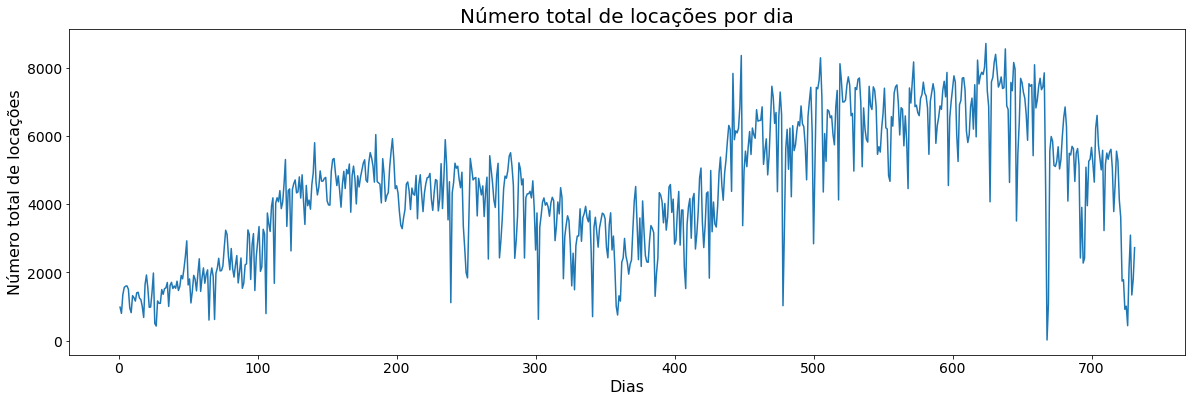

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax = dados['cnt'].plot(fontsize=14)
ax.set_title('Número total de locações por dia', fontsize=20)
ax.set_ylabel("Número total de locações", fontsize=16)
ax.set_xlabel("Dias", fontsize=16)

Box plot da variável dependente (y):

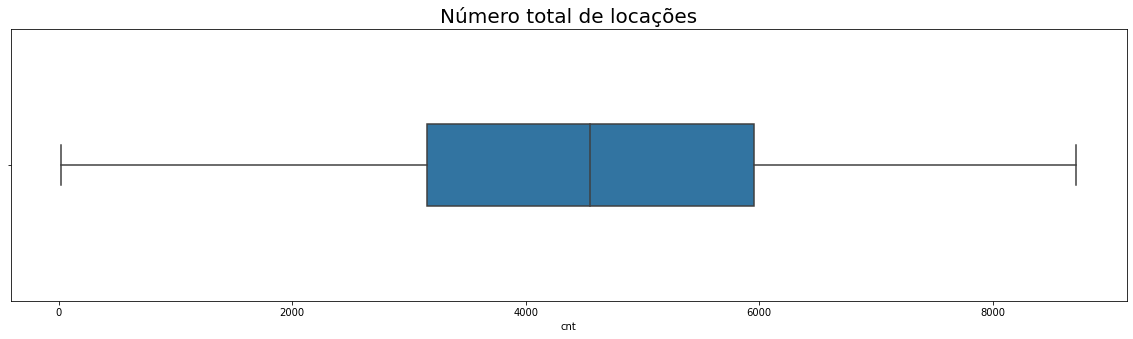

In [ ]:
ax = sns.boxplot(x=dados['cnt'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Número total de locações', fontsize=20)
ax

Distribuição de frequências da variável dependente (y):

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


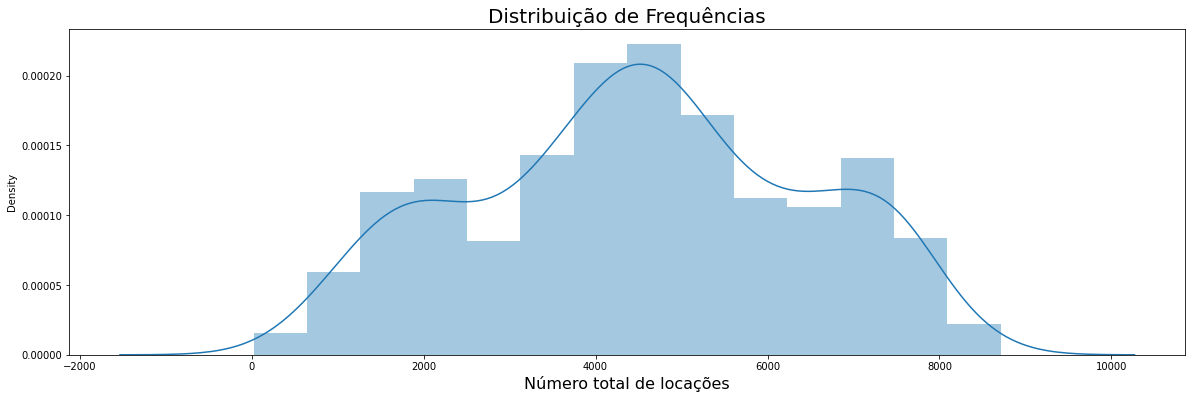

In [ ]:
ax = sns.distplot(dados['cnt'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Número total de locações', fontsize=16)
ax

##**Graficos de dispersão entre as variáveis do dataset:**

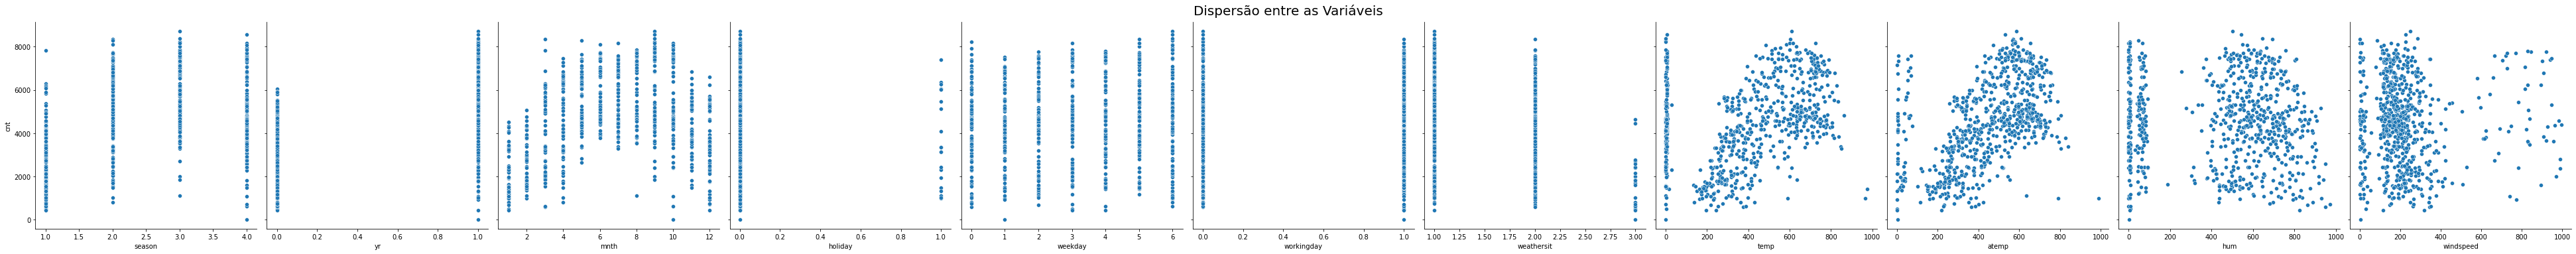

In [ ]:
ax = sns.pairplot(dados, y_vars='cnt', x_vars=['season', 'yr', 'mnth','holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

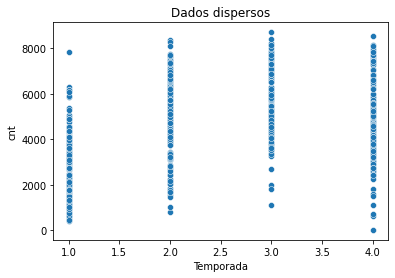

In [ ]:
ax = sns.scatterplot(x=dados['season'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Temporada')
ax.set_ylabel('cnt')
plt.show()

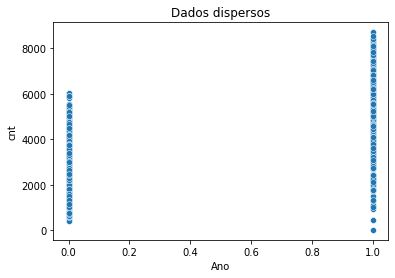

In [ ]:
ax = sns.scatterplot(x=dados['yr'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Ano')
ax.set_ylabel('cnt')
plt.show()

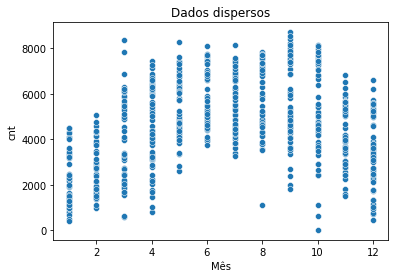

In [ ]:
ax = sns.scatterplot(x=dados['mnth'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Mês')
ax.set_ylabel('cnt')
plt.show()

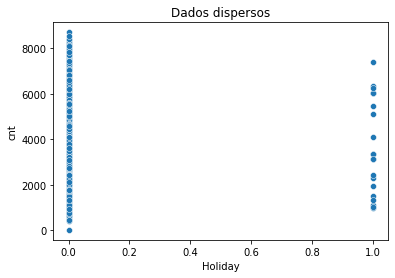

In [ ]:
ax = sns.scatterplot(x=dados['holiday'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Holiday')
ax.set_ylabel('cnt')
plt.show()

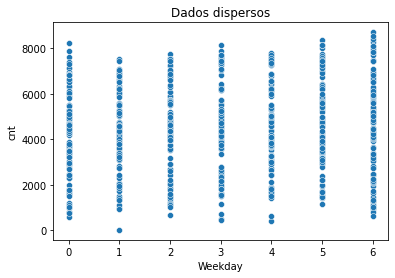

In [ ]:
ax = sns.scatterplot(x=dados['weekday'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Weekday')
ax.set_ylabel('cnt')
plt.show()

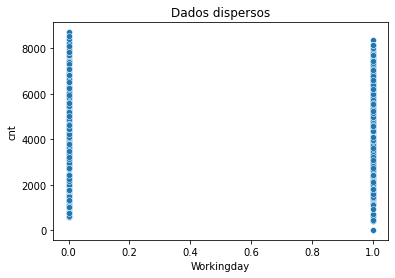

In [ ]:
ax = sns.scatterplot(x=dados['workingday'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Workingday')
ax.set_ylabel('cnt')
plt.show()

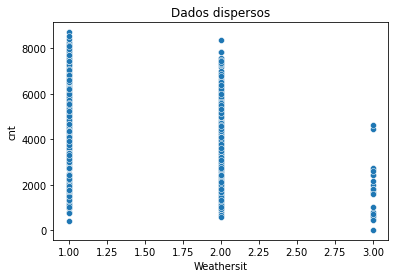

In [ ]:
ax = sns.scatterplot(x=dados['weathersit'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Weathersit')
ax.set_ylabel('cnt')
plt.show()

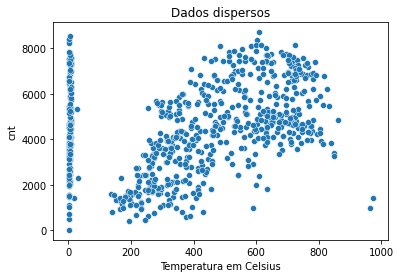

In [ ]:
ax = sns.scatterplot(x=dados['temp'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Temperatura em Celsius')
ax.set_ylabel('cnt')
plt.show()

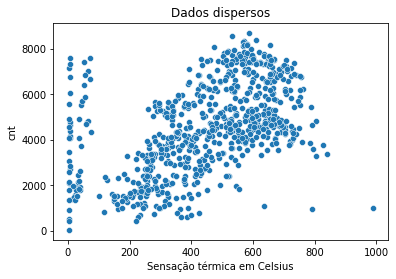

In [ ]:
ax = sns.scatterplot(x=dados['atemp'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Sensação térmica em Celsius')
ax.set_ylabel('cnt')
plt.show()

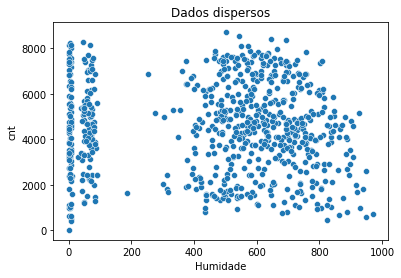

In [ ]:
ax = sns.scatterplot(x=dados['hum'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Humidade')
ax.set_ylabel('cnt')
plt.show()

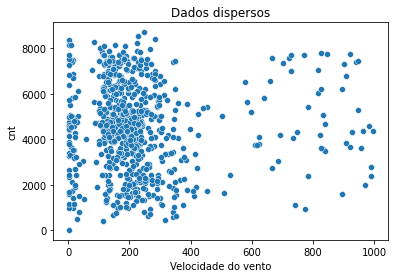

In [ ]:
ax = sns.scatterplot(x=dados['windspeed'], y=dados['cnt'])
ax.set_title('Dados dispersos')
ax.set_xlabel('Velocidade do vento')
ax.set_ylabel('cnt')
plt.show()

##**Variável Dependente X Variáveis Explicativas (Graficos de dispersão das variaveis com reta de regressão linear)**

###(pairplot)

Plotando o relacionamento entre pares de variáveis em um dataset.

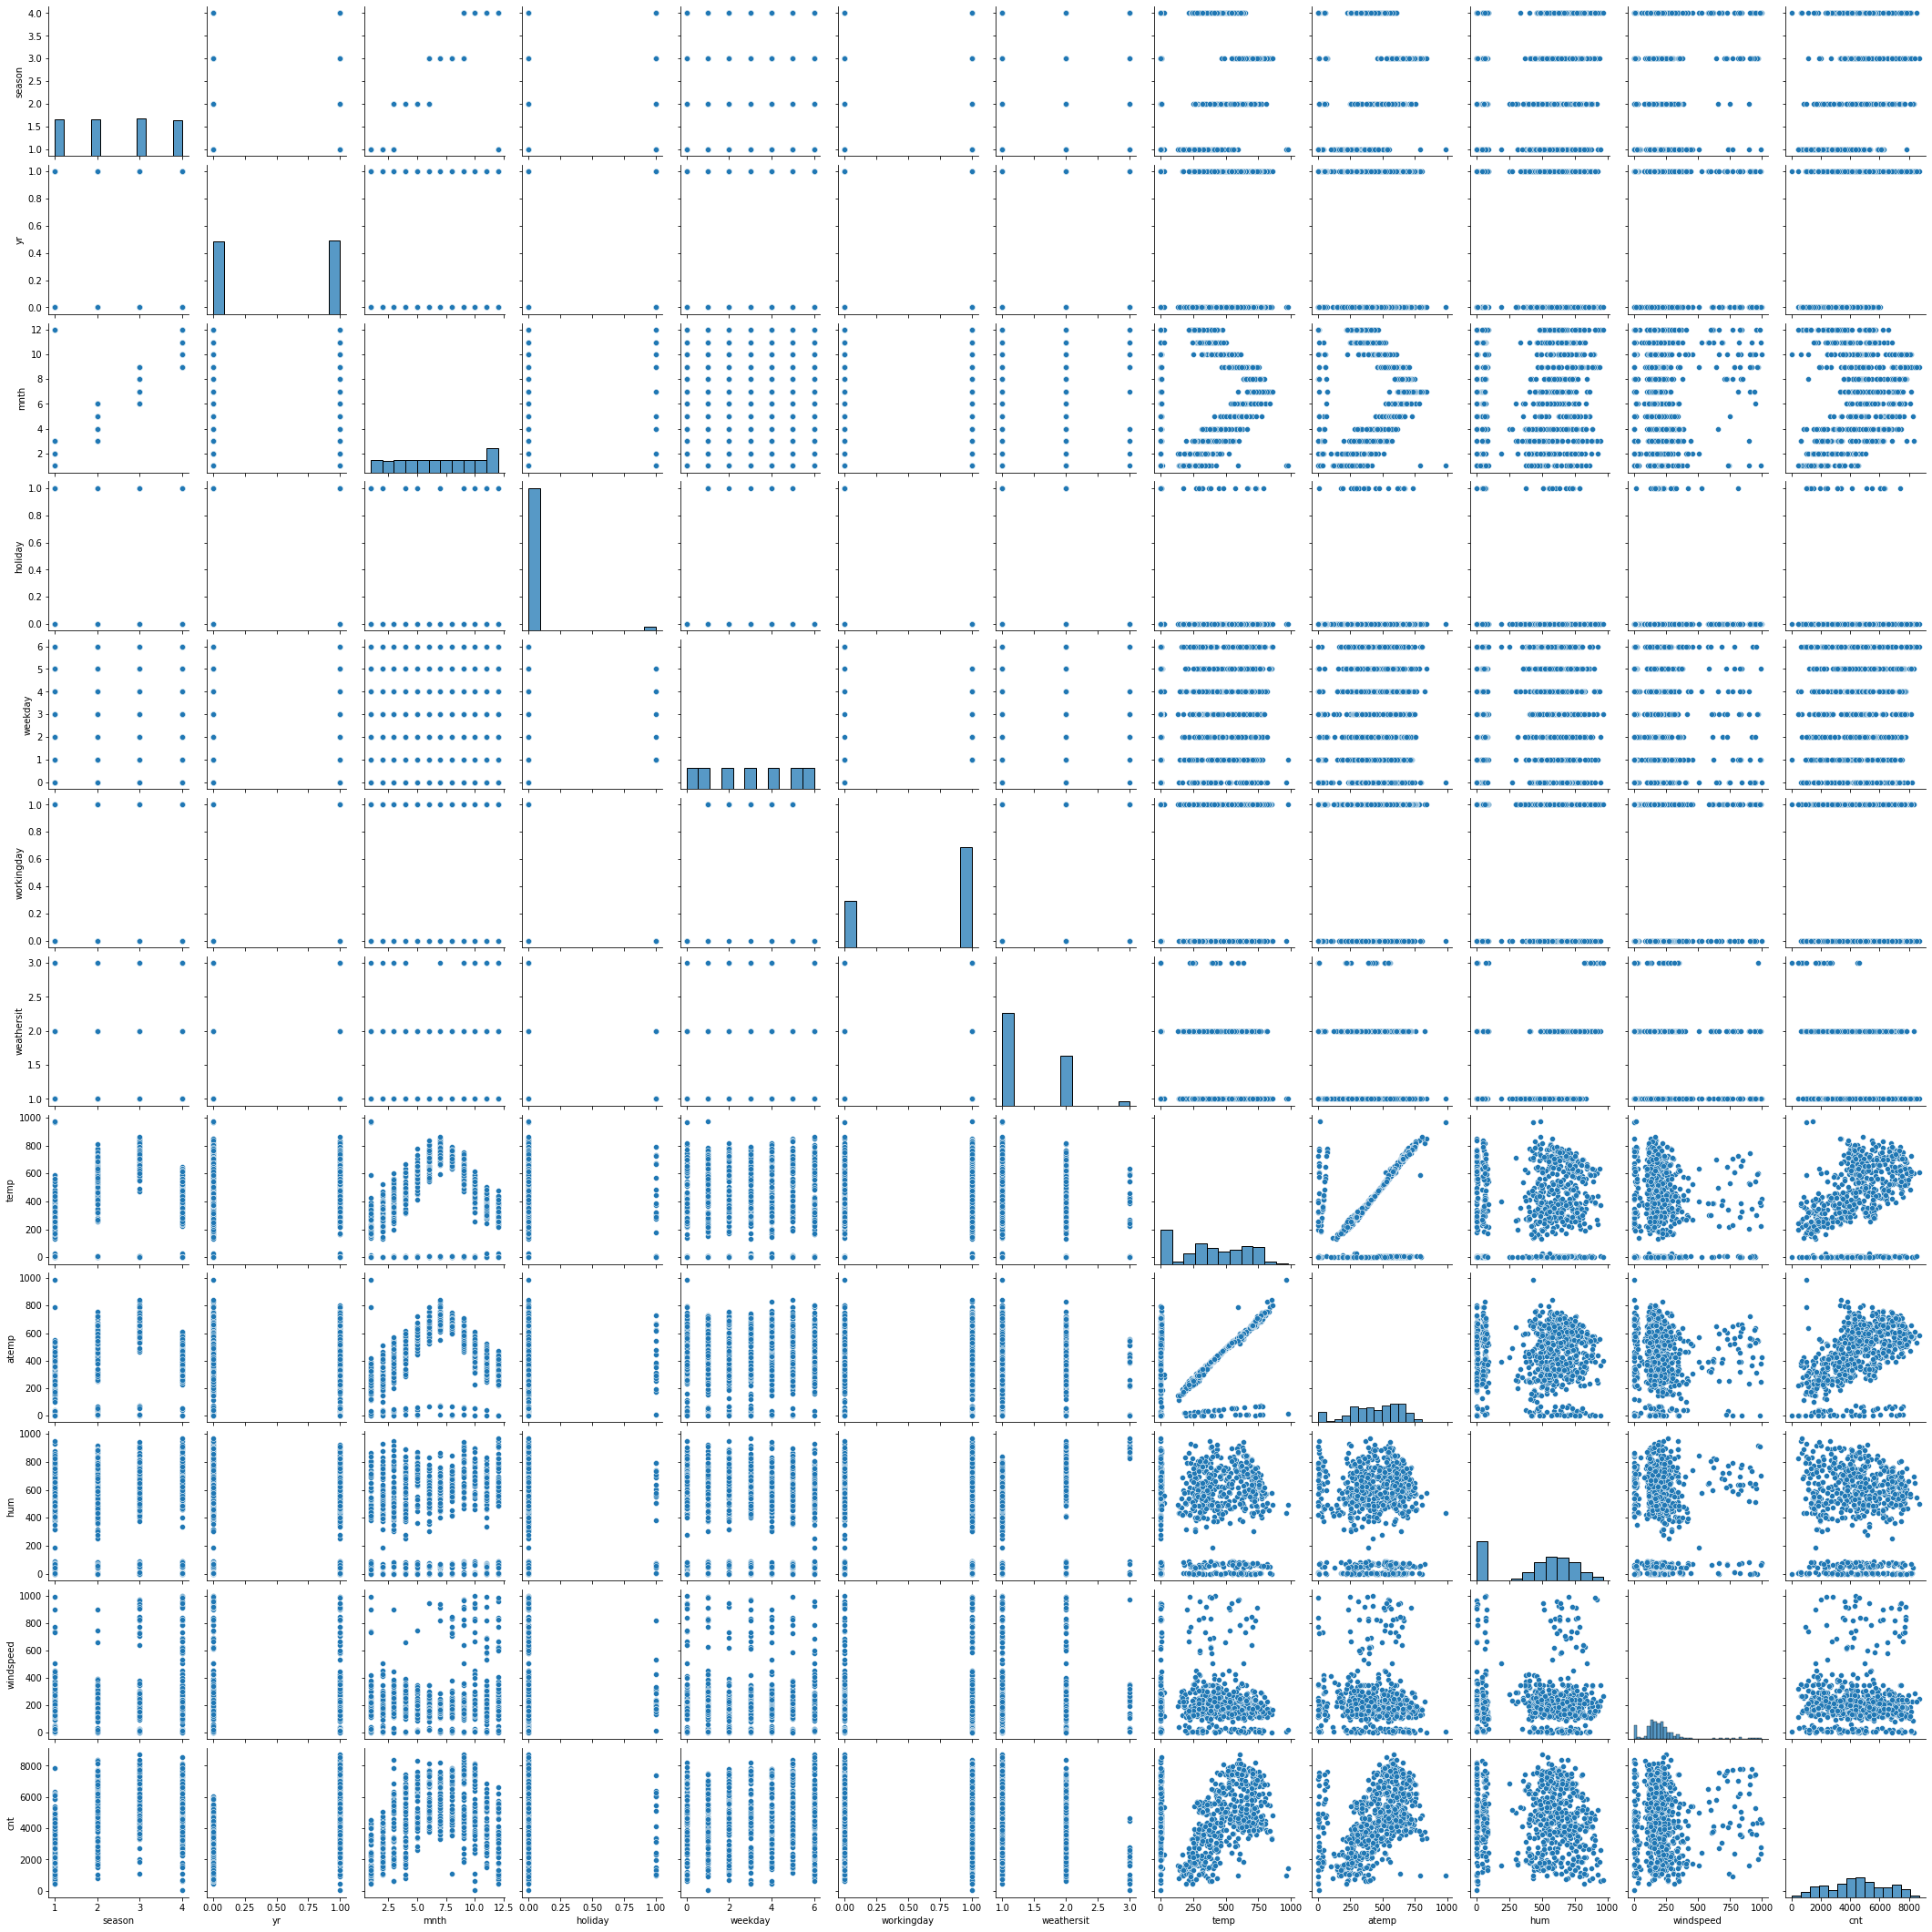

In [ ]:
ax = sns.pairplot(dados)

Plotando o pairplot fixando somente uma variável no eixo y

Text(0.5, 1.05, 'Dispersão entre variaveis')

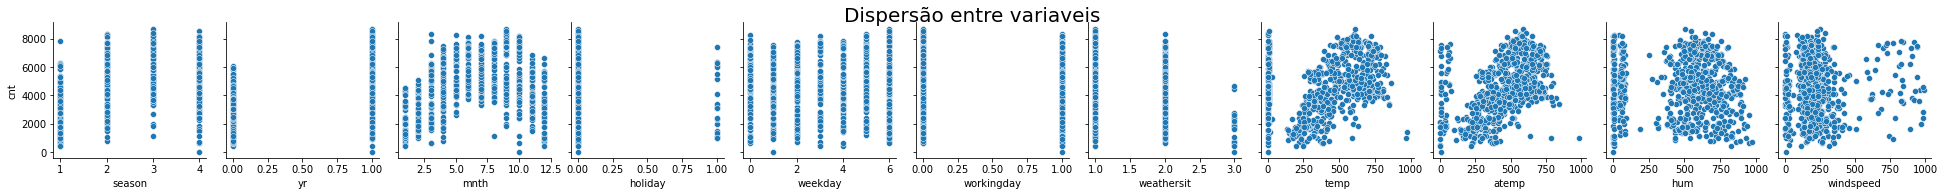

In [ ]:
ax = sns.pairplot(dados, y_vars='cnt', x_vars=['season', 'yr', 'mnth','holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'])
ax.fig.suptitle("Dispersão entre variaveis", fontsize=20, y=1.05)

Ao utilizar a função "pairplot" com kind="reg" combina "regplot" e "PairGrid" para mostrar a relação linear entre variáveis em um conjunto de dados.

Text(0.5, 1.05, 'Dispersão entre variaveis')

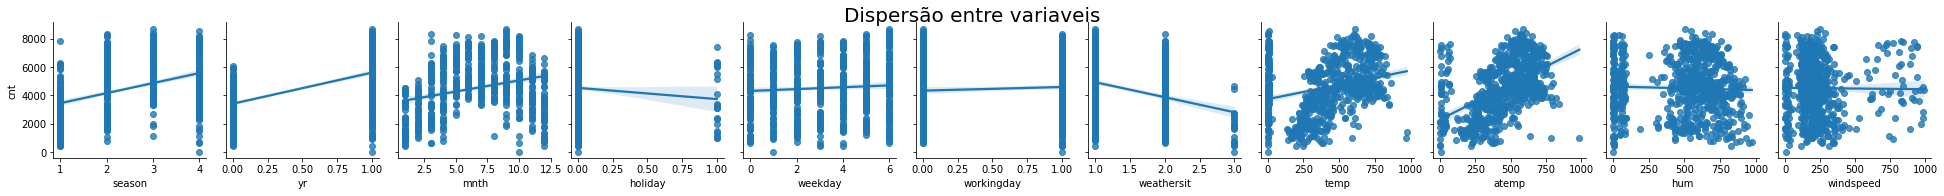

In [ ]:
ax = sns.pairplot(dados, y_vars='cnt', x_vars=['season', 'yr', 'mnth','holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], kind='reg')
ax.fig.suptitle("Dispersão entre variaveis", fontsize=20, y=1.05)

###(joinplot)

####temp: temperatura em Celsius

Plotando o relacionamento entre duas variáveis ("temp" e "cnt") e suas respectivas distribuições de frequência.

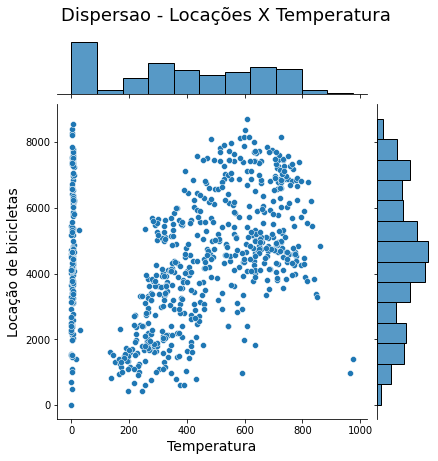

In [ ]:
ax = sns.jointplot(x="temp", y="cnt", data=dados)
ax.fig.suptitle('Dispersao - Locações X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura", "Locação de bicicletas", fontsize=14)
ax

Plotando um jointplot com a reta de regressão estimada

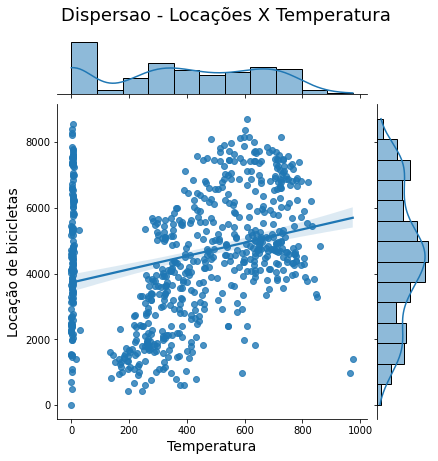

In [ ]:
ax = sns.jointplot(x="temp", y="cnt", data=dados, kind='reg')
ax.fig.suptitle('Dispersao - Locações X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura", "Locação de bicicletas", fontsize=14)
ax

####atemp: sensação térmica em Celsius

Plotando o relacionamento entre duas variáveis ("atemp" e "cnt") e suas respectivas distribuições de frequência.

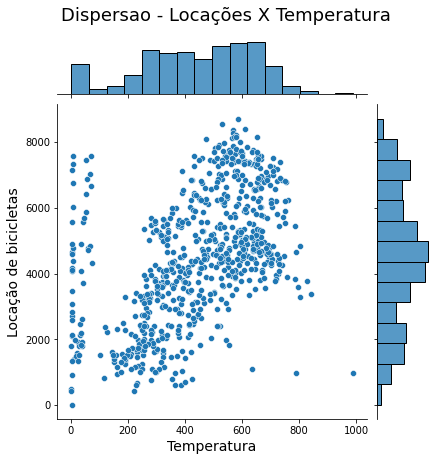

In [ ]:
ax = sns.jointplot(x="atemp", y="cnt", data=dados)
ax.fig.suptitle('Dispersao - Locações X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura", "Locação de bicicletas", fontsize=14)
ax

Plotando um jointplot com a reta de regressão estimada

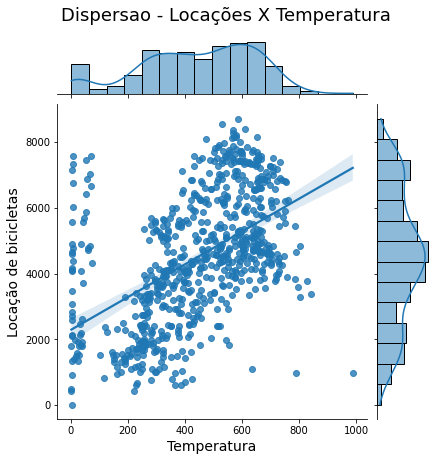

In [ ]:
ax = sns.jointplot(x="atemp", y="cnt", data=dados, kind='reg')
ax.fig.suptitle('Dispersao - Locações X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura", "Locação de bicicletas", fontsize=14)
ax

#**Criando os datasets de treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
columns = ['season', 'yr', 'mnth','holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(dados[columns],dados['cnt'], test_size=0.20, random_state=42)

#**Avaliação dos Modelos:**

Os modelos serão avaliados por:
*   Erro Quadrático Medio (Mean Squared Error)
*   Score





###Raiz do Erro Quadrático Médio
O Erro Quadrático Médio nos informa a que distância a reta de regressão está do conjunto de dados. Calculando o erro (distância entre os pontos e a reta) e elevando ao quadrado (para remover sinais negativos), dando maior peso para grandes erros. A reta com o melhor ajuste possível é a que fornece o menor erro quadrático médio (ou seja, quanto menor for o erro quadratico medio mais próximo o modelo está de acertar)

$$MSE = 1/n {\sum_{i=1}^{n}} (\hat{y}_i-y_i)^2$$

##Score

O valor do Score varia entre 0 e 1, indicando em porcentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor, mais explicativo é o modelo

#**Regressão Linear (Linear Regression)**

Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##**Modelo 1** (season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed)

Criando x_treino, x_teste, y_treino e y_teste

In [ ]:
x_treino1, x_teste1, y_treino1, y_teste1 = train_test_split(dados[['season', 'yr', 'mnth','holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']],dados['cnt'], test_size=0.20, random_state=42)

Instanciando a classe *LinearRegression()* e criando o objeto "lr1"

In [ ]:
lr1 = LinearRegression()

Utilizando o método *fit()* do objeto "lr1" para estimar o modelo linear, utilizando os dados de "treino" (x_treino e y_treino)

In [ ]:
modelo1 = lr1.fit(x_treino1, y_treino1)

Gerando previsões para os dados de "teste" (x_teste) utilizando o método *predict()*

In [ ]:
y_previsto1 = modelo1.predict(x_teste1)

Calculando o Erro Quadratico Medio:

In [ ]:
mse1 = metrics.mean_squared_error(y_teste1, y_previsto1).round(2)
mse1

1090751.42

Calculando o Score:

In [ ]:
score1 = modelo1.score(x_teste1, y_teste1)
score1

0.7279841785050495

Grafico comparando *y_previsto* com *y_teste*

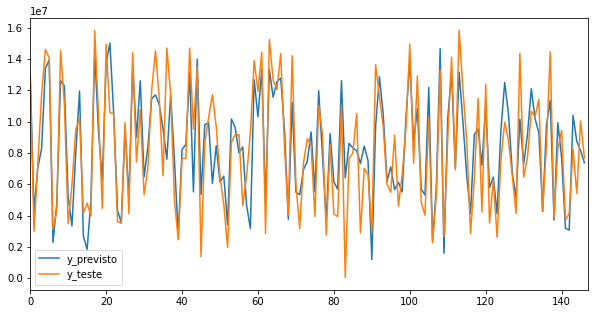

In [ ]:
dados_continuos = {}
for i in ['cnt', 'temp', 'atemp', 'hum', 'windspeed']:
    mean, std = dados[i].mean(), dados[i].std()
    dados_continuos[i] = [mean, std]

fig, ax = plt.subplots(figsize=(10,5))
mean, std = dados_continuos['cnt']

ax.plot(y_previsto1*std+mean, label = 'y_previsto')
ax.plot((y_teste1.values)*std+mean, label = 'y_teste')
ax.set_xlim(left = 0)
ax.set_xlim(right = len(y_previsto1))
ax.legend()

##**Modelo 2** (season, mnth, weathersit, temp, atemp)

Criando x_treino, x_teste, y_treino e y_teste

In [ ]:
x_treino2, x_teste2, y_treino2, y_teste2 = train_test_split(dados[['season', 'mnth', 'weathersit', 'temp', 'atemp']],dados['cnt'], test_size=0.20, random_state=42)

Instanciando a classe *LinearRegression()* e criando o objeto "lr2"

In [ ]:
lr2 = LinearRegression()

Utilizando o método *fit()* do objeto "lr2" para estimar o modelo linear, utilizando os dados de "treino" (x_treino e y_treino)

In [ ]:
modelo2 = lr2.fit(x_treino2, y_treino2)

Gerando previsões para os dados de "teste" (x_teste) utilizando o método *predict()*

In [ ]:
y_previsto2 = modelo2.predict(x_teste2)

Calculando o Erro Quadratico Medio:

In [ ]:
mse2 = metrics.mean_squared_error(y_teste2, y_previsto2).round(2)
mse2

2349620.19

Calculando o Score:

In [ ]:
score2 = modelo2.score(x_teste2, y_teste2)
score2

0.4140426018383775

Grafico comparando *y_previsto* com *y_teste*

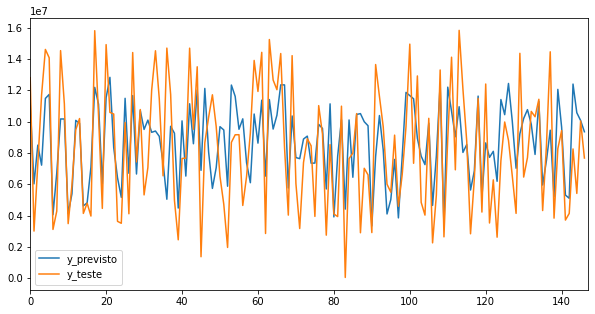

In [ ]:
dados_continuos = {}
for i in ['cnt', 'temp', 'atemp']:
    mean, std = dados[i].mean(), dados[i].std()
    dados_continuos[i] = [mean, std]

fig, ax = plt.subplots(figsize=(10,5))
mean, std = dados_continuos['cnt']

ax.plot(y_previsto2*std+mean, label = 'y_previsto')
ax.plot((y_teste2.values)*std+mean, label = 'y_teste')
ax.set_xlim(left = 0)
ax.set_xlim(right = len(y_previsto2))
ax.legend()

##**Modelo 3** (season, weathersit, temp, atemp)

In [ ]:
x_treino3, x_teste3, y_treino3, y_teste3 = train_test_split(dados[['season', 'weathersit', 'temp', 'atemp']],dados['cnt'], test_size=0.20, random_state=42)

In [ ]:
lr3 = LinearRegression()
modelo3 = lr3.fit(x_treino3, y_treino3)
y_previsto3 = modelo3.predict(x_teste3)

Calculando o Erro Quadratico Medio:

In [ ]:
mse3 = metrics.mean_squared_error(y_teste3, y_previsto3).round(2)
mse3

2375043.84

Calculando o Score:

In [ ]:
score3 = modelo3.score(x_teste3, y_teste3)
score3

0.40770235388484044

Grafico comparando *y_previsto* com *y_teste*

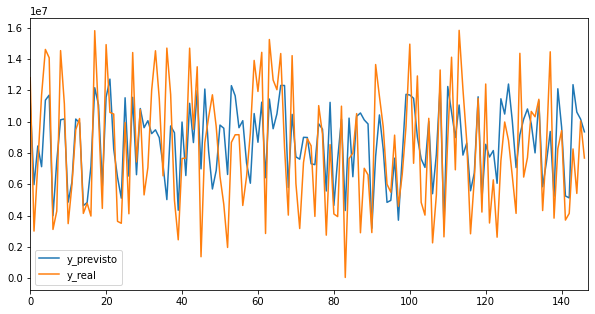

In [ ]:
dados_continuos = {}
for i in ['cnt', 'temp', 'atemp']:
    mean, std = dados[i].mean(), dados[i].std()
    dados_continuos[i] = [mean, std]

fig, ax = plt.subplots(figsize=(10,5))
mean, std = dados_continuos['cnt']

ax.plot(y_previsto3*std+mean, label = 'y_previsto')
ax.plot((y_teste3.values)*std+mean, label = 'y_real')
ax.set_xlim(left = 0)
ax.set_xlim(right = len(y_previsto3))
ax.legend()

##**Comparando Modelo 1, Modelo 2 e Modelo 3**

In [ ]:
comparacao = pd.DataFrame(list(zip( [1,2,3],
                                    [mse1,mse2,mse3],
                                    [score1,score2,score3],)),
                          columns=['Modelo','MSR', 'Score'])

comparacao = comparacao.set_index('Modelo')
comparacao

,MSR,Score
Modelo,,
1,1090751.42,0.727984
2,2349620.19,0.414043
3,2375043.84,0.407702


##**Conclusão Modelo 1, Modelo 2 e Modelo 3:** 

A partir da tabela anterior, é possivel concluir que o Modelo 1 é o melhor modelo em comparação com o Modelo 2 e o Modelo 3, pois possui o menor Erro Quadratico Medio e o maior Score. Porém, em comparação com modelos otimos, os ultimos três modelos estão ruins, os Erros Quadraticos Medios estão muito altos, os Scores estão muito baixos. Isto ocorre porque Regressão Linear funciona melhor quando o dataset tem dados numéricos continuos, no entanto, no dataset atual, existem muitos dados binarios. Portanto, é necessario mudar a estrategia, optando por um modelo baseado em Árvore de Decisão.

#**Arvore de Decisão (Decision Tree)**

##**Modelo 4**

Criando x_treino, x_teste, y_treino e y_teste

In [ ]:
x_treino4, x_teste4, y_treino4, y_teste4 = train_test_split(dados[columns],dados['cnt'], test_size=0.20, random_state=42)

Importando *DecisionTreeRegressor* da biblioteca *scikit-learn*

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Instanciando a classe *DecisionTreeRegressor()* e criando o objeto "dtr"

In [ ]:
dtr = DecisionTreeRegressor()

Utilizando o método *fit()* do objeto "dtr" para estimar o modelo de arvore de desição utilizando os dados de "treino" (x_treino e y_treino)

In [ ]:
modelo4 = dtr.fit(x_treino4, y_treino4)

Gerando previsões para os dados de "teste" (x_teste) utilizando o método *predict()*

In [ ]:
y_previsto4 = dtr.predict(x_teste4)

Calculando o Erro Quadratico Medio:

In [ ]:
mse4 = metrics.mean_squared_error(y_teste4, y_previsto4).round(2)
mse4

944615.51

Calculando o Score:

In [ ]:
score4 = modelo4.score(x_teste4, y_teste4)
score4

0.7644281197746134

Grafico comparando *y_previsto* com *y_teste*

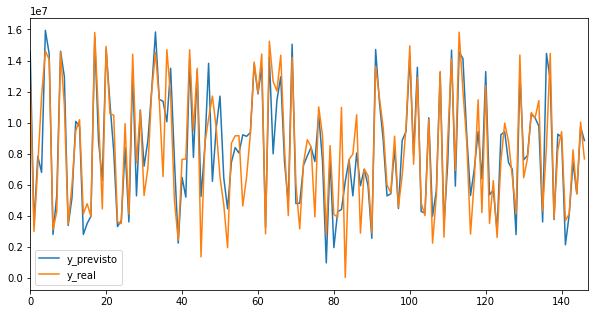

In [ ]:
dados_continuos = {}
for i in ['cnt', 'temp', 'atemp', 'hum', 'windspeed']:
    mean, std = dados[i].mean(), dados[i].std()
    dados_continuos[i] = [mean, std]

fig, ax = plt.subplots(figsize=(10,5))
mean, std = dados_continuos['cnt']

ax.plot(y_previsto4*std+mean, label = 'y_previsto')
ax.plot((y_teste4.values)*std+mean, label = 'y_real')
ax.set_xlim(left = 0)
ax.set_xlim(right = len(y_previsto4))
ax.legend()

##**Comparando o Modelo 4 com o Modelo 1, Modelo 2 e Modelo 3**

Adicionando o Modelo 4 no datafreme de comparacao:

In [ ]:
comparacao.loc[4] = [mse4, score4]

Visualizando o dataframe de comparacao:

In [ ]:
comparacao

,MSR,Score
Modelo,,
1,1090751.42,0.727984
2,2349620.19,0.414043
3,2375043.84,0.407702
4,944615.51,0.764428


##**Conclusão Modelo 4:**

O modelo 4 tornou-se melhor que o modelo 1 (que foi o melhor da comparação anterior), tendo um menor Erro Quadratico Medio e um Score maior. Portanto, a teoria de que o modelo de Árvore de Decisão tende a ser superior ao modelo Regressão Linear para datasets que possuem mais dados binarios, está se confirmando.

#**Floresta Aleatória (Random Forest)**

##**Modelo 5**

Criando x_treino, x_teste, y_treino e y_teste

In [ ]:
x_treino5, x_teste5, y_treino5, y_teste5 = train_test_split(dados[columns],dados['cnt'], test_size=0.20, random_state=42)

Importando *RandomForestRegressor* da biblioteca *scikit-learn*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Instanciando a classe *RandomForestRegressor()* e criando o objeto "rfr"

In [ ]:
rfr = RandomForestRegressor()

Utilizando o método *fit()* do objeto "rfr" para estimar o modelo de floresta aleatoria utilizando os dados de "treino" (x_treino e y_treino)

In [ ]:
modelo5 = rfr.fit(x_treino5, y_treino5)

Gerando previsões para os dados de "teste" (x_teste) utilizando o método *predict()*

In [ ]:
y_previsto5 = modelo5.predict(x_teste5)

Calculando o Erro Quadratico Medio:

In [ ]:
mse5 = metrics.mean_squared_error(y_teste5, y_previsto5).round(2)
mse5

633755.28

Calculando o Score:

In [ ]:
score5 = modelo5.score(x_teste5, y_teste5)
score5

0.8419516505820848

Grafico comparando *y_previsto* com *y_teste*

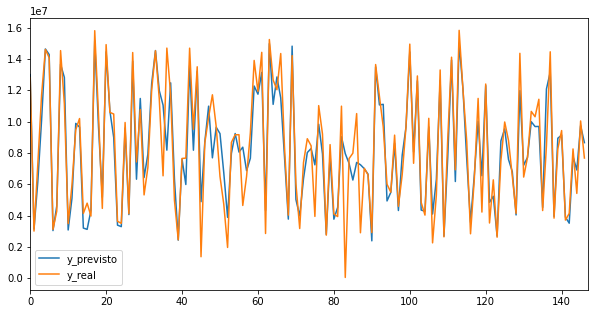

In [ ]:
dados_continuos = {}
for i in ['cnt', 'temp', 'atemp', 'hum', 'windspeed']:
    mean, std = dados[i].mean(), dados[i].std()
    dados_continuos[i] = [mean, std]

fig, ax = plt.subplots(figsize=(10,5))
mean, std = dados_continuos['cnt']

ax.plot(y_previsto5*std+mean, label = 'y_previsto')
ax.plot((y_teste5.values)*std+mean, label = 'y_real')
ax.set_xlim(left = 0)
ax.set_xlim(right = len(y_previsto5))
ax.legend()

##**Comparando o Modelo 5 com o Modelo 4**

Adicionando o Modelo 5 no datafreme de comparacao

In [ ]:
comparacao.loc[5] = [mse5, score5]

Visualizando o dataframe de comparacao:

In [ ]:
comparacao

,MSR,Score
Modelo,,
1,1090751.42,0.727984
2,2349620.19,0.414043
3,2375043.84,0.407702
4,944615.51,0.764428
5,633755.28,0.841952


##**Conclusão Modelo 5:**
O modelo 5 tornou-se melhor que o modelo 4 (que foi o melhor da comparação anterior).Em comparação com o melhor modelo anterior, o Erro Quadratico Medio diminuiu e o Score aumentou.

#**Ajustando os hiperparametros a Floresta Aleatória (Random Forest)**

##**Modelo 6**

Criando x_treino, x_teste, y_treino e y_teste

In [ ]:
x_treino6, x_teste6, y_treino6, y_teste6 = train_test_split(dados[columns],dados['cnt'], test_size=0.20, random_state=42)

Importando *GridSearchCV* da biblioteca *scikit-learn*

In [ ]:
from sklearn.model_selection import GridSearchCV

Especificando os parâmetros de tunning:

In [ ]:
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}

Instanciando o RandomForest


In [ ]:
rf = RandomForestRegressor()

Instanciando o GridSearch


In [ ]:
grid = GridSearchCV(rf, parametros)

Executando o grid

In [ ]:
grid.fit(x_treino6, y_treino6)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

Verificando os melhores parâmetros

In [ ]:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 750}



*   min_samples_leaf: é o número mínimo de amostras necessárias para estar em um nó folha 
*   min_samples_split: é o número mínimo de amostras necessárias para dividir um nó interno 
*   n_estimators: é o número de árvores que será gerada 

Obtendo o melhor estimador

In [ ]:
modelo6 = grid.best_estimator_

Gerando previsões para os dados de "teste" (x_teste) utilizando o método *predict()*

In [ ]:
y_previsto6 = modelo6.predict(x_teste6)

Calculando o Erro Quadratico Medio:

In [ ]:
mse6 = metrics.mean_squared_error(y_teste6, y_previsto6).round(2)
mse6

645372.64

Calculando o Score:

In [ ]:
score6 = modelo6.score(x_teste6, y_teste6)
score6

0.8390544681370591

Grafico comparando *y_previsto* com *y_teste*

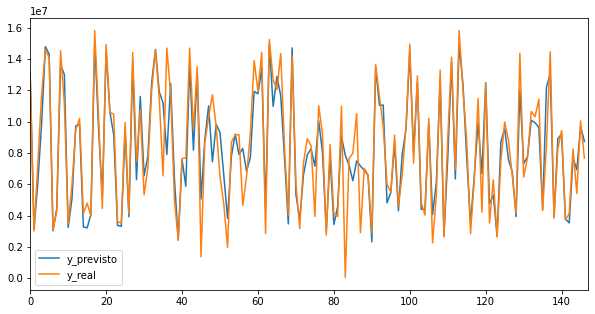

In [ ]:
dados_continuos = {}
for i in ['cnt', 'temp', 'atemp', 'hum', 'windspeed']:
    mean, std = dados[i].mean(), dados[i].std()
    dados_continuos[i] = [mean, std]

fig, ax = plt.subplots(figsize=(10,5))
mean, std = dados_continuos['cnt']

ax.plot(y_previsto6*std+mean, label = 'y_previsto')
ax.plot((y_teste6.values)*std+mean, label = 'y_real')
ax.set_xlim(left = 0)
ax.set_xlim(right = len(y_previsto6))
ax.legend()

##**Comparando o Modelo 6 com o Modelo 5**

Adicionando o Modelo 5 no datafreme de comparacao

In [ ]:
comparacao.loc[6] = [mse6, score6]

Visualizando o dataframe de comparacao:

In [ ]:
comparacao

,MSR,Score
Modelo,,
1,1090751.42,0.727984
2,2349620.19,0.414043
3,2375043.84,0.407702
4,944615.51,0.764428
5,633755.28,0.841952
6,645372.64,0.839054


##**Conclusão Modelo 6:**
O modelo 6 tornou-se melhor que o modelo 5 (que foi o melhor da comparação anterior). A diferença foi muito pequena, porém, em comparação com o melhor modelo anterior, o Erro Quadratico Medio diminuiu e o Score aumentou.

#**Multilayer Perceptron Regressor (MLP)**



##**Modelo 7**

Leitura dos dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PERIODOS IFPB/7 - SETIMO PERIODO/MINERAÇÃO DE DADOS/hour.csv')

Visualizando os dados

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,2.879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,2.727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,2.727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,2.879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,2.879,0.75,0.0,0,1,1


Features categoricas que serão transformadas em features binarias

In [ ]:
features_categoricas = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

Tranformando features categoricas ('season', 'weathersit', 'mnth', 'hr', 'weekday') em features binarias

In [ ]:
for i in features_categoricas:
    categoricas = pd.get_dummies(df[i], prefix=i, drop_first=False)
    df = pd.concat([df, categoricas], axis=1)

Removendo as features 'instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'casual', 'registered'

In [ ]:
data = df.drop(['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'casual', 'registered'], axis=1)

Visualizando novamente os dados


In [ ]:
data.head()

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,16,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,32,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Verificando o tamanho do dataset

In [ ]:
data.shape

(17379, 57)

Realizando a normalização / padronização dos dados continuos

In [ ]:
for i in ['cnt', 'temp', 'hum', 'windspeed']:
    mean, std = data[i].mean(), data[i].std()
    data.loc[:, i] = (data[i] - mean)/std

Dividino o dataset em teste e treino

In [ ]:
teste = data[-21*24:]
treino = data[:-81*24]

Dividindo os datasets de teste, validacao e treino em x_teste, y_teste, x_treino e y_treino

In [ ]:
x_teste = teste.drop(['cnt'], axis=1)
y_teste = teste['cnt']
x_treino = treino.drop(['cnt'], axis=1)
y_treino = treino['cnt']

### Treinando a MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
modelo7 = MLPRegressor(hidden_layer_sizes=(30),
                                activation = 'relu',
                                solver = 'adam',
                                learning_rate_init = 0.0001,
                                max_iter = 1000,
                                random_state=2018,
                                verbose = 10,
                                tol=0.000001
                       )

In [ ]:
modelo7.fit(x_treino, y_treino)

Iteration 1, loss = 0.58440483
Iteration 2, loss = 0.50552826
Iteration 3, loss = 0.45055092
Iteration 4, loss = 0.40892462
Iteration 5, loss = 0.37517901
Iteration 6, loss = 0.34702692
Iteration 7, loss = 0.32302246
Iteration 8, loss = 0.30265986
Iteration 9, loss = 0.28504921
Iteration 10, loss = 0.26943095
Iteration 11, loss = 0.25538714
Iteration 12, loss = 0.24252840
Iteration 13, loss = 0.23062421
Iteration 14, loss = 0.21950864
Iteration 15, loss = 0.20912775
Iteration 16, loss = 0.19946786
Iteration 17, loss = 0.19048695
Iteration 18, loss = 0.18232170
Iteration 19, loss = 0.17499696
Iteration 20, loss = 0.16847637
Iteration 21, loss = 0.16265423
Iteration 22, loss = 0.15752468
Iteration 23, loss = 0.15293755
Iteration 24, loss = 0.14888236
Iteration 25, loss = 0.14525409
Iteration 26, loss = 0.14212003
Iteration 27, loss = 0.13925591
Iteration 28, loss = 0.13677683
Iteration 29, loss = 0.13445137
Iteration 30, loss = 0.13243626
Iteration 31, loss = 0.13054238
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=30, learning_rate='constant',
             learning_rate_init=0.0001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=2018, shuffle=True, solver='adam',
             tol=1e-06, validation_fraction=0.1, verbose=10, warm_start=False)

Gerando previsões para os dados de "teste" (x_teste) utilizando o método *predict()*

In [ ]:
y_previsto = modelo7.predict(x_teste)

Calculando o Erro Quadratico Medio:

In [ ]:
mse7 = mean_squared_error(y_teste, y_previsto).round(2)
mse7

0.13

Calculando o Score:

In [ ]:
score7 = r2_score(y_teste, y_previsto)
score7

0.8047603622698821

Grafico comparando *y_previsto* com *y_teste*

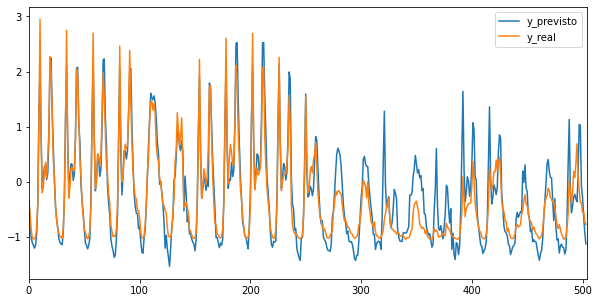

In [ ]:
dados_continuos = {}
for i in ['cnt', 'temp', 'hum', 'windspeed']:
    mean, std = data[i].mean(), data[i].std()
    dados_continuos[i] = [mean, std]

fig, ax = plt.subplots(figsize=(10,5))
mean, std = dados_continuos['cnt']

ax.plot(y_previsto*std+mean, label = 'y_previsto')
ax.plot((y_teste.values)*std+mean, label = 'y_real')
ax.set_xlim(left = 0)
ax.set_xlim(right = len(y_previsto))
ax.legend()

##**Comparando o Modelo 7 com o Modelo 6**

Adicionando o Modelo 7 no datafreme de comparacao

In [ ]:
comparacao.loc[7] = [mse7, score7]

Visualizando o dataframe de comparacao:

In [ ]:
comparacao

,MSR,Score
Modelo,,
1,1090751.42,0.727984
2,2349620.19,0.414043
3,2375043.84,0.407702
4,944615.51,0.764428
5,633755.28,0.841952
6,645372.64,0.839054
7,0.13,0.804760


##**Conclusão Modelo 7:**
O modelo 7 possui um Erro Medio Quadratico muito menor que o modelo 6, porém possui um Score menor.